#Description:
You own a web site that random users access for news. Your goal is to choose a news article to show to each user, that will maximize the chance that the user clicks on it (to read it further). This is also known as "the clickthrough rate".

<ipython-input-2-582e921dee3c>:37: RuntimeWarning: invalid value encountered in scalar divide
  ucb[i, j] = estimated_scores[i, j] + np.sqrt(2 * np.log(t) / counts[i, j])
<ipython-input-2-582e921dee3c>:37: RuntimeWarning: divide by zero encountered in scalar divide
  ucb[i, j] = estimated_scores[i, j] + np.sqrt(2 * np.log(t) / counts[i, j])


Estimated Bandit Probabilities (Last Round):
[[0.81 0.65 0.54 0.36 0.08]
 [0.24 0.45 0.48 0.5  0.78]
 [0.   0.26 0.58 0.71 0.51]
 [0.3  0.25 0.47 0.53 0.78]]


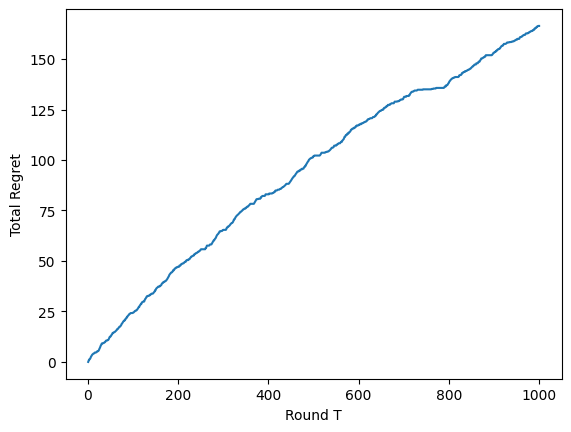

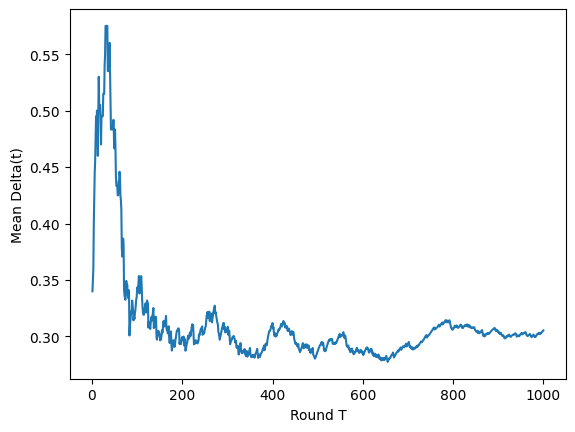

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(56)

# Αρχικοί ορισμοί
articles = 5
classes = 4
T = 1000
class_prob = [0.25, 0.25, 0.25, 0.25]

# Ο πραγματικός πίνακας πιθανοτήτων (bandit)
bandit = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],  # Γυναίκες άνω των 25
    [0.2, 0.4, 0.5, 0.6, 0.8],  # Άντρες άνω των 25
    [0.2, 0.4, 0.6, 0.8, 0.5],  # Γυναίκες κάτω των 25
    [0.5, 0.2, 0.4, 0.6, 0.8]   # Άντρες κάτω των 25
])

# Αρχικοποίηση μεταβλητών
counts = np.zeros((classes, articles))
rewards = np.zeros((classes, articles))
estimated_scores = np.array(bandit)  # Αρχική εκτίμηση ίση με τον πραγματικό πίνακα πιθανοτήτων
ucb = np.zeros((classes, articles))
regret = np.zeros(T)
delta_t_history = []

# Κύριος βρόχος για τους T γύρους
total_regret = 0  # Συνολικό regret
for t in range(T):
    # Επανάληψη για κάθε κατηγορία χρηστών
    for i in range(classes):
        # Επανάληψη για κάθε άρθρο
        for j in range(articles):
            if t > 0:
                # Υπολογισμός του UCB
                ucb[i, j] = estimated_scores[i, j] + np.sqrt(2 * np.log(t) / counts[i, j])
            else:
                # Πρώτος γύρος: αρχικοποίηση με τις πραγματικές τιμές
                ucb[i, j] = bandit[i, j]

    # Επιλογή κατηγορίας χρήστη
    user_class = np.random.choice(classes, p=class_prob)
    # Επιλογή άρθρου με το μεγαλύτερο UCB
    article = np.argmax(ucb[user_class])
    # Καταγραφή ανταμοιβής
    reward = np.random.binomial(1, p=bandit[user_class, article])
    rewards[user_class, article] += reward
    counts[user_class, article] += 1
    # Ενημέρωση της εκτίμησης της ανταμοιβής
    estimated_scores[user_class, article] = rewards[user_class, article] / counts[user_class, article]

    # Υπολογισμός του regret
    best_score = np.max(bandit[user_class])
    total_regret += (best_score - bandit[user_class, article])
    regret[t] = total_regret # / t

    # Υπολογισμός του Delta(t) - Ξεκινάει από μηδέν
    delta_t = np.zeros((classes, articles))  # Αρχικοποίηση με μηδενικό πίνακα
    for i in range(classes):
        for j in range(articles):
            delta_t[i, j] = np.max(estimated_scores[i]) - estimated_scores[i, j]
    delta_t_history.append(np.mean(delta_t))

# Εκτύπωση των εκτιμήσεων για τον τελευταίο γύρο
print("Estimated Bandit Probabilities (Last Round):")
print(np.round(estimated_scores, 2))

# Εκτύπωση του γραφήματος με τον συνολικό regret
plt.xlabel("Round T")
plt.ylabel("Total Regret")
plt.plot(np.arange(1, T + 1), regret)
plt.show()

# Εκτύπωση του γραφήματος για το delta
plt.xlabel("Round T")
plt.ylabel("Mean Delta(t)")
plt.plot(np.arange(1, T + 1), delta_t_history)
plt.show()
